# Trade-off Values Test

## Notebook for testing trade-off computation.

This notebook demonstrates the use of `tradeoff()` function in `dm` module.

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

<IPython.core.display.Javascript object>


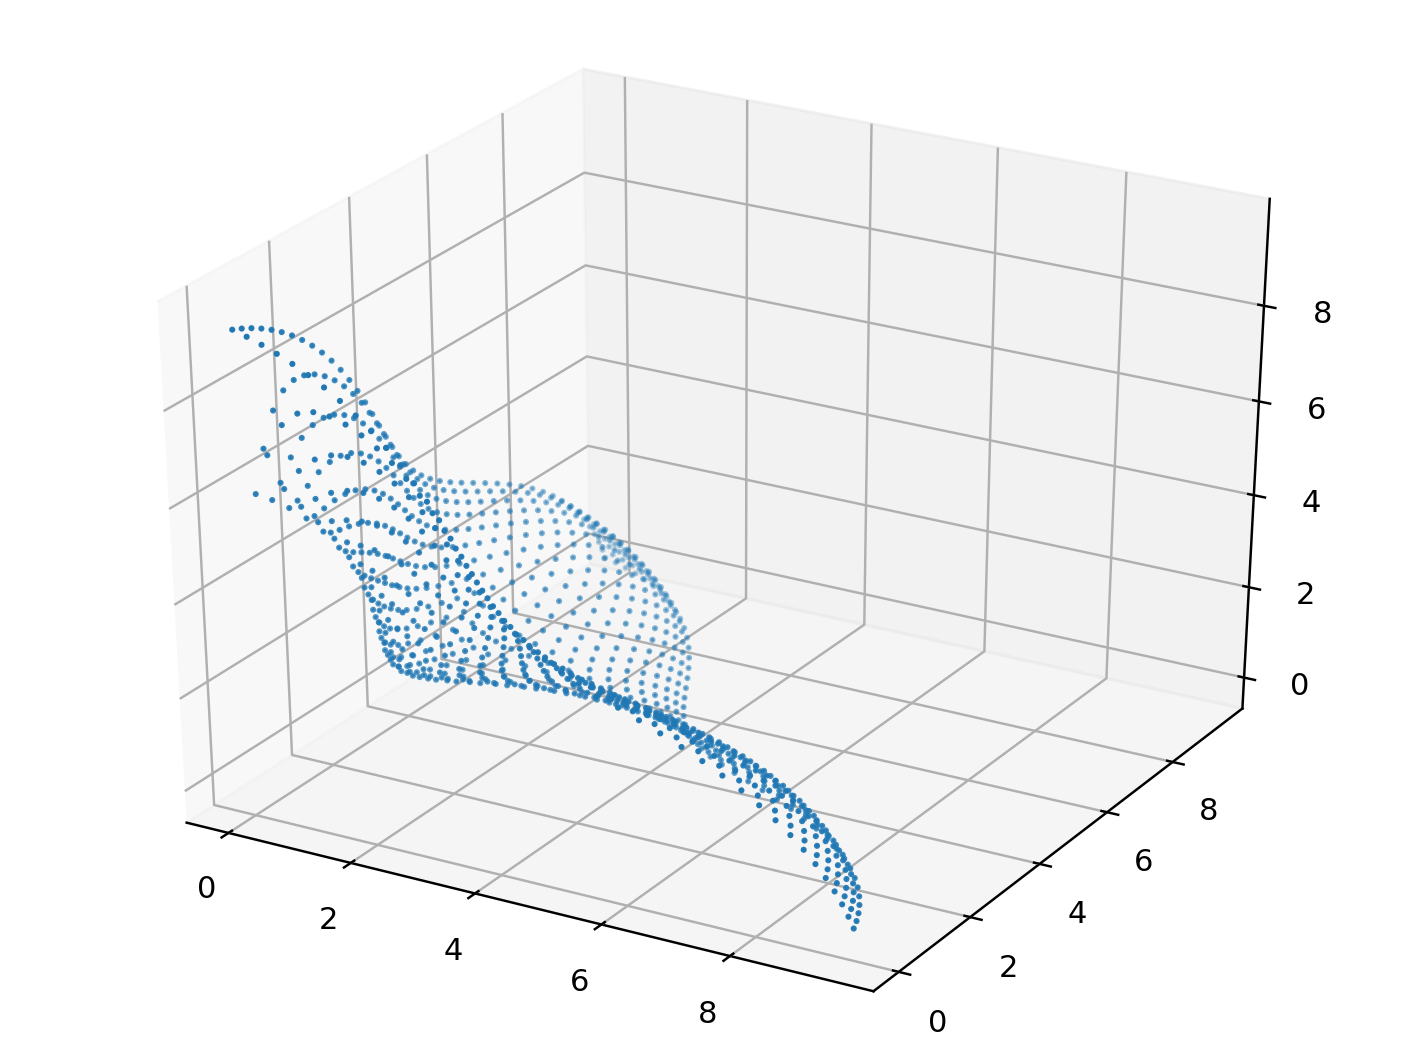

In [2]:
%matplotlib notebook

dim = '3d'
# fullpathf = "../data/dtlz2-nbi/{0:s}/dataf.csv".format(dim)
# fullpathf = "../data/dtlz2/{0:s}/dataf.csv".format(dim)
fullpathf = "../data/debmdk-all-nbi/{0:s}/dataf.csv".format(dim)
# fullpathf = "../data/debmdk-all/{0:s}/dataf.csv".format(dim)

path, filenamef = os.path.split(fullpathf)
dirs = path.split('/')
frontname = dirs[-2]

F = np.loadtxt(fullpathf, delimiter=',')

# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(F[:,0], F[:,1], F[:,2], s=1)
plt.show()

### Test with the module from `pymoo`

[  0   8  20  21  22  23  35  43 324 359 651 652 677 985 989]


<IPython.core.display.Javascript object>


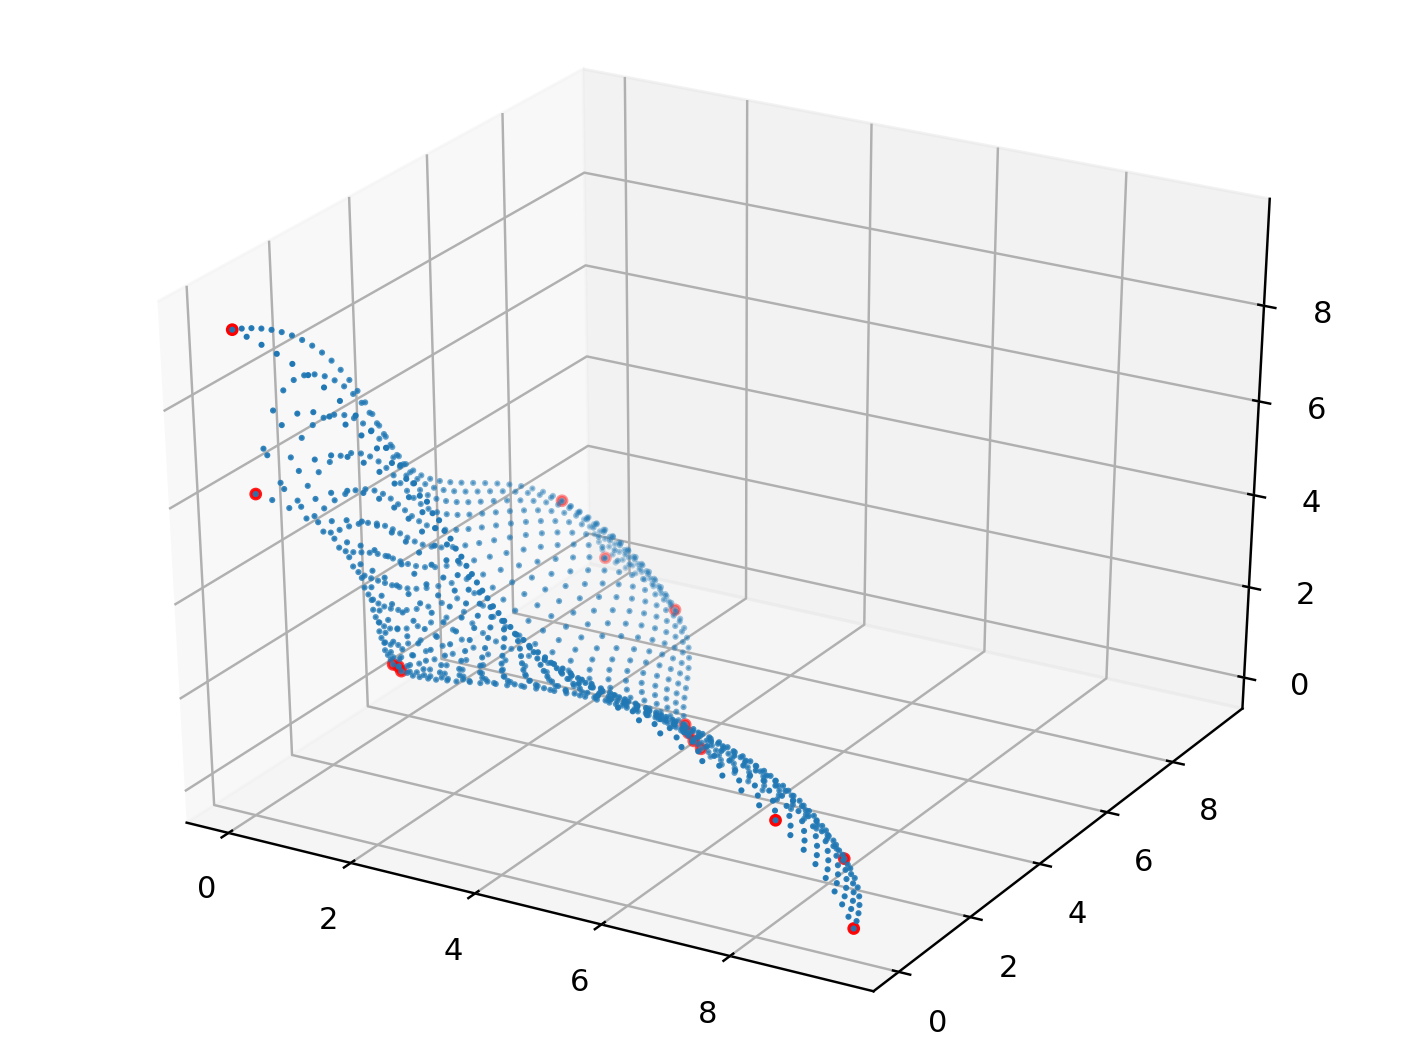

In [3]:
# %matplotlib notebook

import os
import numpy as np
from pymoo.factory import get_decision_making

dm = get_decision_making("high-tradeoff")

Ik = dm.do(F)
print(Ik)

# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(F[:,0], F[:,1], F[:,2], s=1)
ax.scatter(F[Ik,0], F[Ik,1], F[Ik,2], c='red', s=10)
plt.show()

### Test with `dm` module of ours, since the implementation is slightly different.

[  0   8  20  21  22  23  35  43 324 359 651 652 677 985 989]


<IPython.core.display.Javascript object>


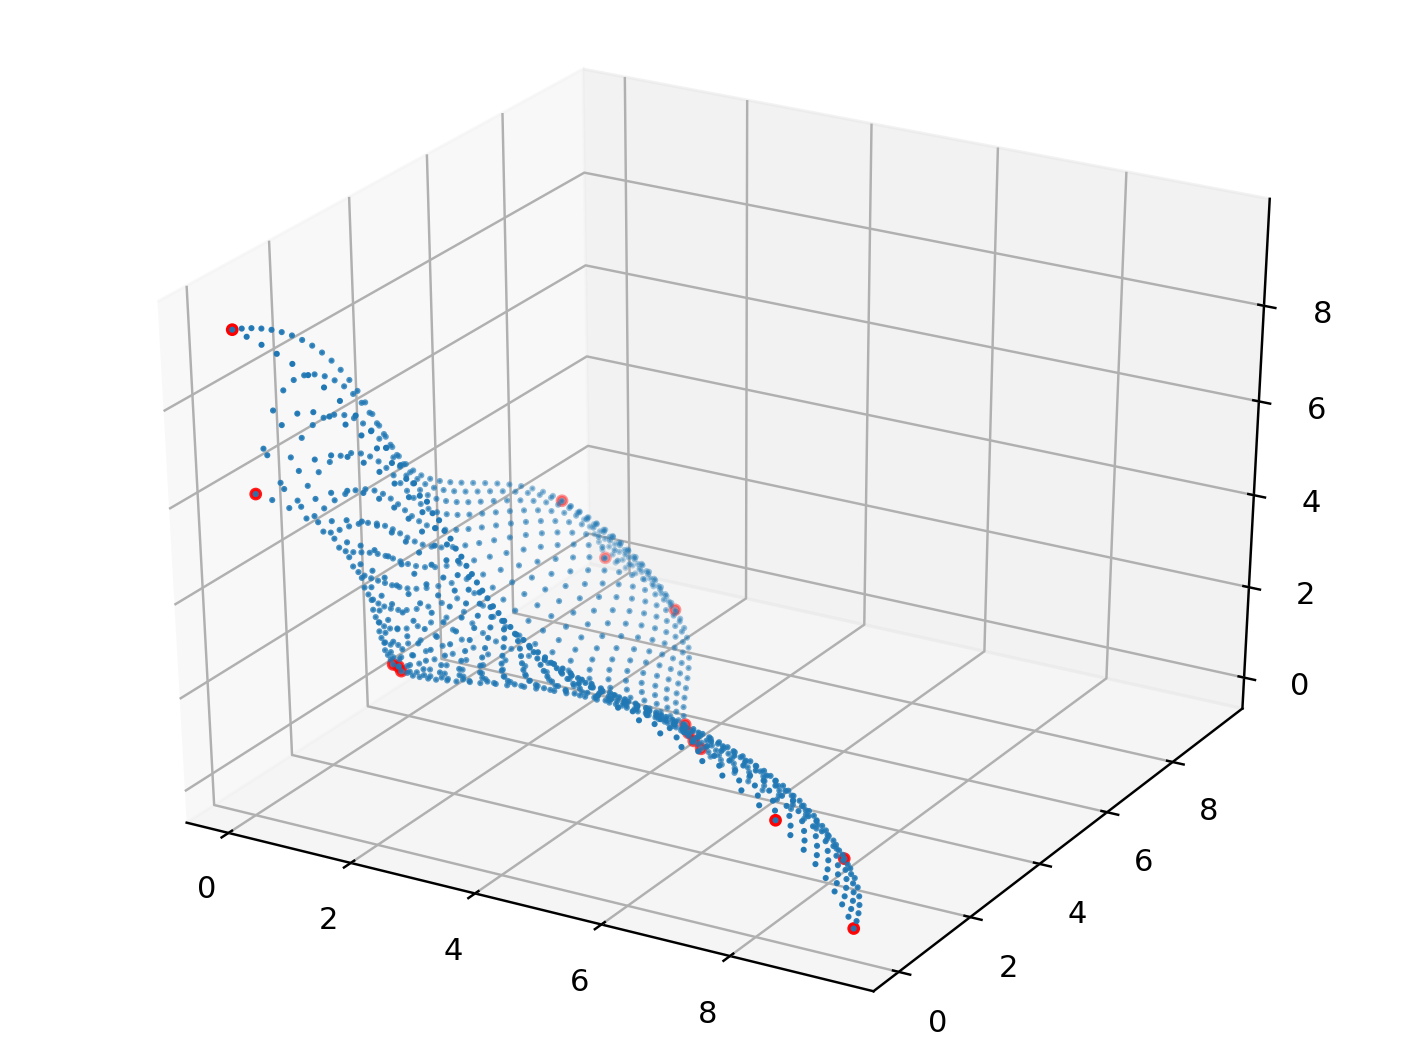

In [4]:
# %matplotlib notebook

sys.path.append('../')
from vis.utils import dm

"""
These parameters found to be quite good settings for DEBMDK problems.
But for other problems, they might be completely different.
"""
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #2d-nbi
Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #3d-nbi
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #4d-nbi
# Mu,Ik = dm.tradeoff(F, epsilon = 0.5, penalize_extremes = False) #8d-nbi
# Mu,Ik = dm.tradeoff(F, k = 200, penalize_extremes = False) #8d-nbi

# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #2d-lhs
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #3d-lhs
# Mu,Ik = dm.tradeoff(F, epsilon = 0.25, penalize_extremes = True) #4d-lhs
# Mu,Ik = dm.tradeoff(F, epsilon = 0.25, penalize_extremes = True) #8d-lhs
# Mu,Ik = dm.tradeoff(F, k = 200, penalize_extremes = True) #8d-lhs

print(Ik)

# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(F[:,0], F[:,1], F[:,2], s=1)
ax.scatter(F[Ik,0], F[Ik,1], F[Ik,2], c='red', s=10)
plt.show()

### Try to change the size, then color

<IPython.core.display.Javascript object>


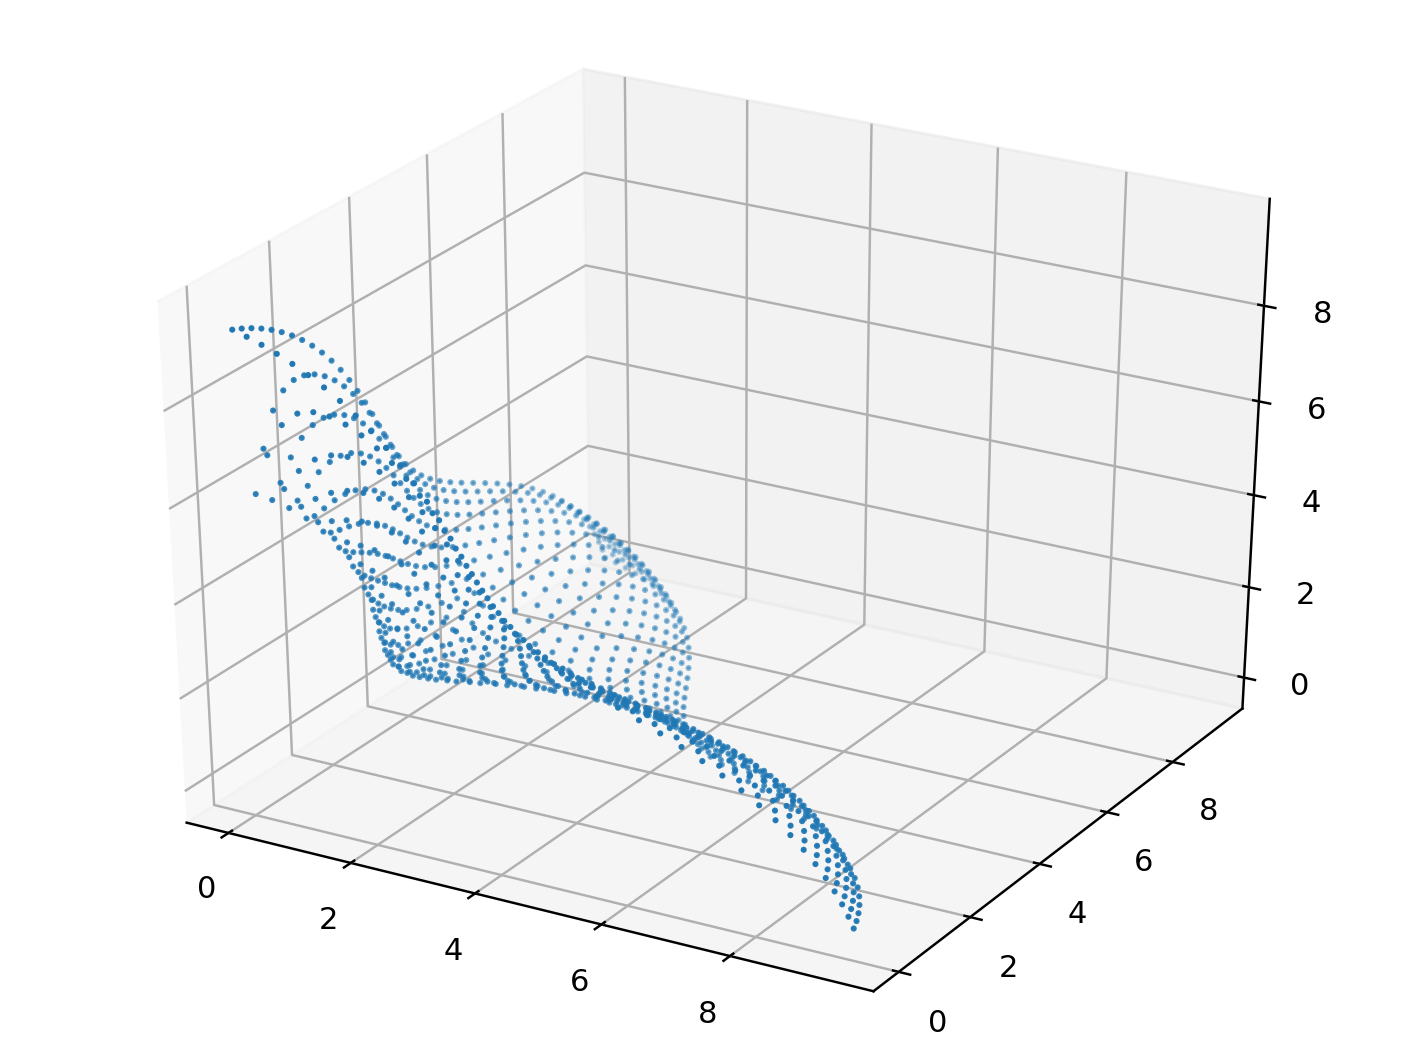

In [5]:
# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(F[:,0], F[:,1], F[:,2], s=1)
plt.show()

<IPython.core.display.Javascript object>


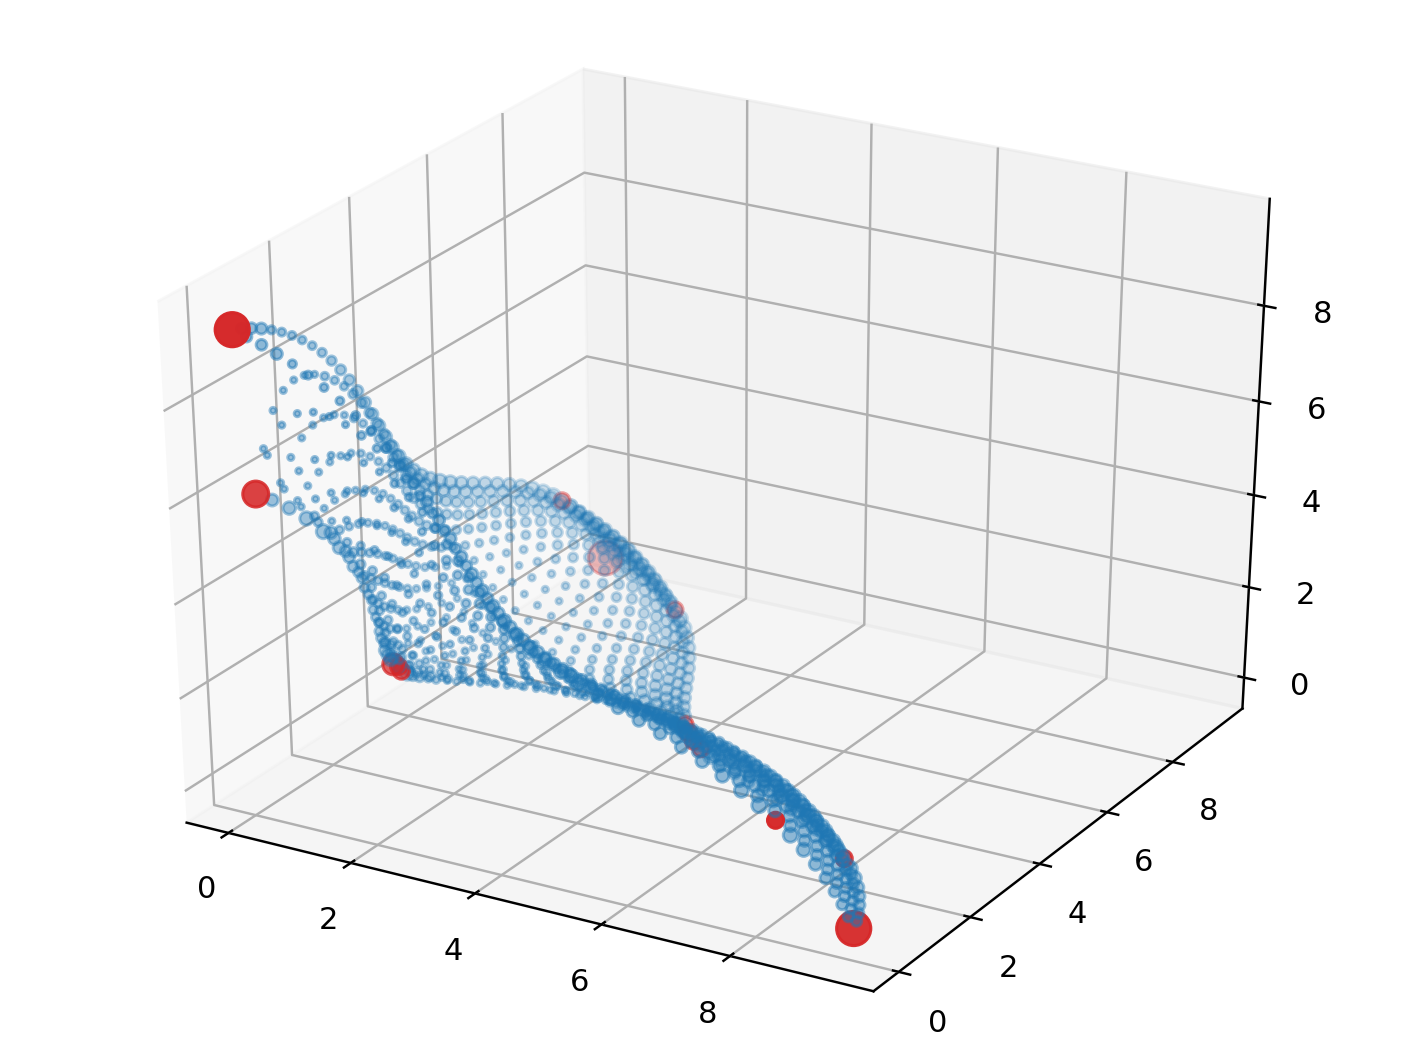

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mc
from vis.utils import transform as tr


S = np.power(tr.normalize(Mu, lb=np.array([2.0]), ub=np.array([10.0])), 2)
S[Ik] = np.power(tr.normalize(Mu[Ik], lb=np.array([3.0]), ub=np.array([5.0])), 3)

C = np.array([mc.to_rgba(mc.TABLEAU_COLORS['tab:blue'], 0.5) for _ in range(Mu.shape[0])])
C[Ik] = np.array([mc.to_rgba(mc.TABLEAU_COLORS['tab:red'], 1.0) for _ in range(Ik.shape[0])])

# Plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(F[:,0], F[:,1], F[:,2], s=S, c=C)
plt.show()